# Plotting thermocline depth changes in the LongRunMIP
#### Christopher Callahan
#### Christopher.W.Callahan.GR@dartmouth.edu

#### Mechanics
Dependencies

In [7]:
import xarray as xr
import numpy as np
import sys
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.io import loadmat
from matplotlib.patches import Polygon
from scipy import signal
from eofs.xarray import Eof
from scipy import stats
import matplotlib.colors as colors
import math

Data location

In [8]:
loc_in = "../Data/Depth_Profile/"

#### plotting

In [9]:
modelnames_fig_v2 = ['CCSM3 abrupt4x','CCSM3 abrupt4x', \
    'CESM1.0.4 abrupt4x','CESM1.0.4 abrupt4x','CNRM-CM6.1 abrupt4x','CNRM-CM6.1 abrupt4x', \
    'GFDL-CM3 1pct2x','GFDL-CM3 1pct2x','GFDL-ESM2M 1pct2x','GFDL-ESM2M 1pct2x', \
    'GISS-E2-R abrupt4x','GISS-E2-R abrupt4x','HadCM3L abrupt4x','HadCM3L abrupt4x', \
    'IPSL-CM5A-LR abrupt4x','IPSL-CM5A-LR abrupt4x', \
    'MIROC3.2 1pct4x','MIROC3.2 1pct4x', \
    'MPIESM-1.2 abrupt4x','MPIESM-1.2 abrupt4x']

modelnames_file_v2 = ['CCSM3_abrupt4x','CCSM3_abrupt4x', \
    'CESM104_abrupt4x','CESM104_abrupt4x','CNRMCM61_abrupt4x','CNRMCM61_abrupt4x', \
    'GFDLCM3_1pct2x','GFDLCM3_1pct2x','GFDLESM2M_1pct2x','GFDLESM2M_1pct2x', \
    'GISSE2R_abrupt4x','GISSE2R_abrupt4x','HadCM3L_abrupt4x','HadCM3L_abrupt4x', \
    'IPSLCM5A_abrupt4x','IPSLCM5A_abrupt4x', \
    'MIROC32_1pct4x','MIROC32_1pct4x', \
    'MPIESM12_abrupt4x','MPIESM12_abrupt4x']

index = ['nino4','nino3', \
    'nino4','nino3','nino4','nino3', \
    'nino4','nino3','nino4','nino3', \
    'nino4','nino3','nino4','nino3', \
    'nino4','nino3','nino4','nino3', \
    'nino4','nino3']

depth_name = ["z_t","z_t","z_t","z_t", \
             "lev","lev","st_ocean","st_ocean", \
             "st_ocean","st_ocean","lev","lev", \
             "depth","depth","lev","lev","depth","depth", \
             "depth","depth"]

lon_name = ["x","x","x","x", \
             "x","x","lon","lon", \
             "lon","lon","lon","lon", \
             "lon","lon","x","x","lon","lon", \
             "x","x"]

CCSM3_abrupt4x
CCSM3_abrupt4x
CESM104_abrupt4x


/dartfs-hpc/rc/home/y/f003k8y/.conda/envs/ccallahan/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/dartfs-hpc/rc/home/y/f003k8y/.conda/envs/ccallahan/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice


CESM104_abrupt4x
CNRMCM61_abrupt4x


/dartfs-hpc/rc/home/y/f003k8y/.conda/envs/ccallahan/lib/python3.7/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/dartfs-hpc/rc/home/y/f003k8y/.conda/envs/ccallahan/lib/python3.7/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/dartfs-hpc/rc/home/y/f003k8y/.conda/envs/ccallahan/lib/python3.7/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.u

CNRMCM61_abrupt4x


/dartfs-hpc/rc/home/y/f003k8y/.conda/envs/ccallahan/lib/python3.7/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/dartfs-hpc/rc/home/y/f003k8y/.conda/envs/ccallahan/lib/python3.7/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/dartfs-hpc/rc/home/y/f003k8y/.conda/envs/ccallahan/lib/python3.7/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/dartfs-hpc/rc/h

GFDLCM3_1pct2x
GFDLCM3_1pct2x
GFDLESM2M_1pct2x
GFDLESM2M_1pct2x
GISSE2R_abrupt4x
GISSE2R_abrupt4x
HadCM3L_abrupt4x
HadCM3L_abrupt4x
IPSLCM5A_abrupt4x
IPSLCM5A_abrupt4x
MIROC32_1pct4x
MIROC32_1pct4x
MPIESM12_abrupt4x
MPIESM12_abrupt4x


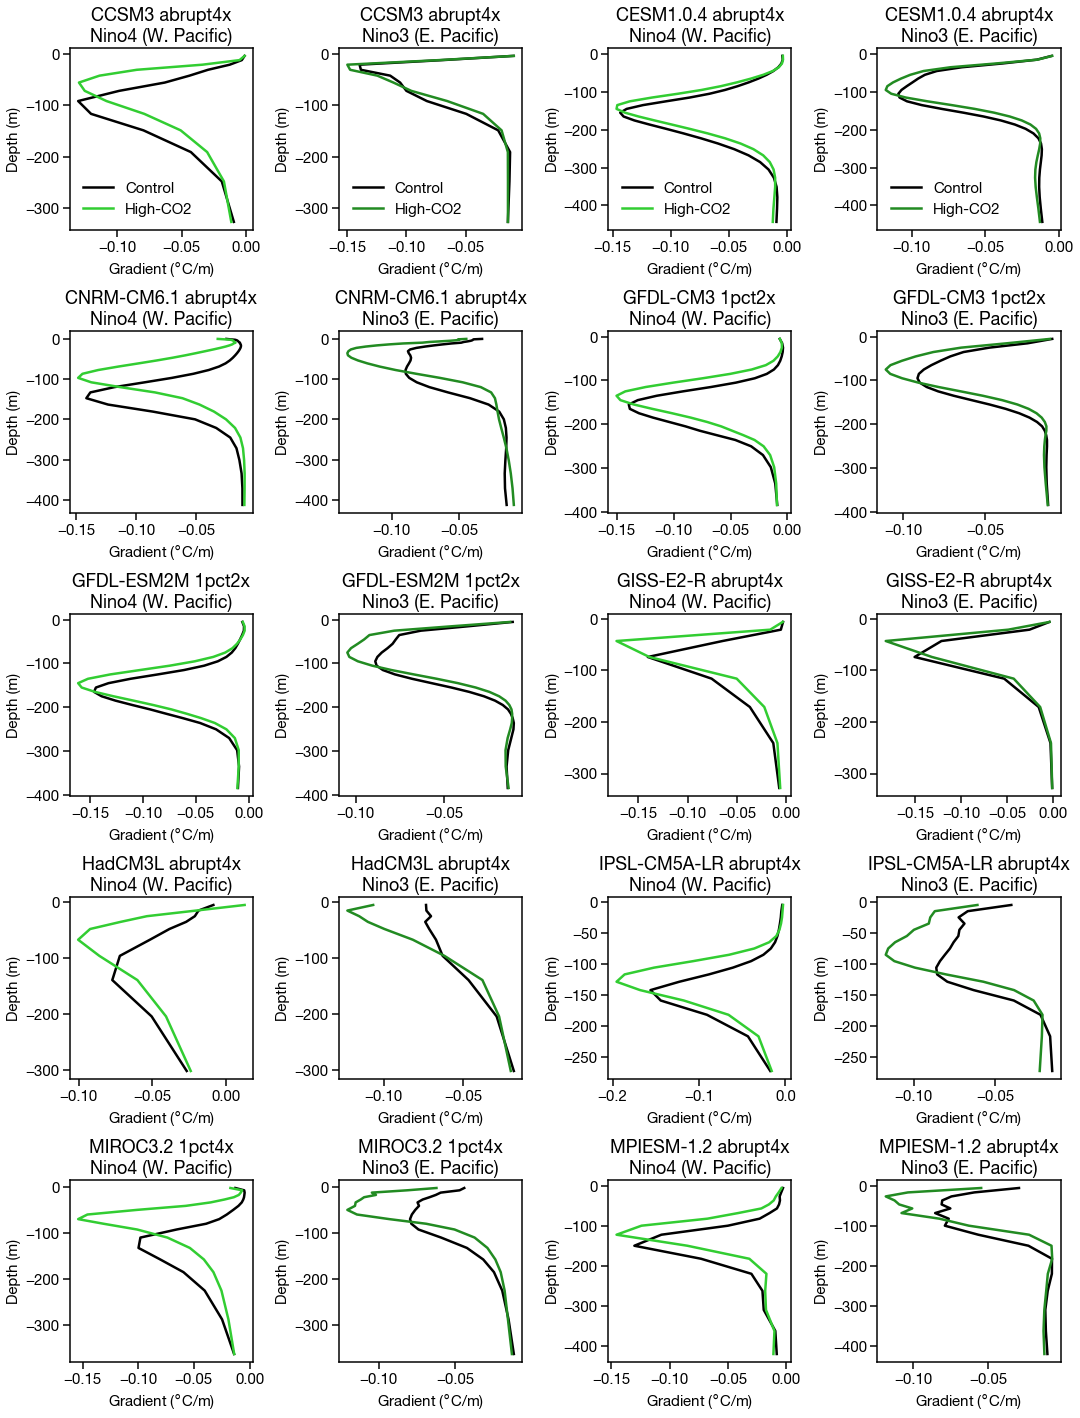

In [10]:
fig = plt.figure(figsize=(16,22))

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 15
rcParams["axes.linewidth"] = 1.5
rcParams['xtick.major.size'] = 7
rcParams['xtick.major.width'] = 1.5
rcParams['ytick.major.size'] = 7
rcParams['ytick.major.width'] = 1.5

gs1 = gridspec.GridSpec(5,4)
#gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0.1,right=0.96,top=0.93,bottom=0.1,wspace=0.47,hspace=0.55)


for i in np.arange(0,20,1):
    
    model, exp = modelnames_file_v2[i].split("_")
    print(modelnames_file_v2[i])
    ind = index[i]
    
    if ((model == "MIROC32") | (model == "MPIESM12")):
        depth_profile_exp = xr.DataArray(xr.open_dataset(loc_in+ind+"_depth_profile_"+model+"_"+exp+".nc",decode_times=False).data_vars["profile"])
        depth_profile_control = xr.DataArray(xr.open_dataset(loc_in+ind+"_depth_profile_"+model+"_control.nc",decode_times=False).data_vars["profile"])
    else:
        depth_profile_exp = xr.DataArray(xr.open_dataset(loc_in+ind+"_depth_profile_"+model+"_"+exp+".nc").data_vars["profile"])
        depth_profile_control = xr.DataArray(xr.open_dataset(loc_in+ind+"_depth_profile_"+model+"_control.nc").data_vars["profile"])
    
    ax = plt.subplot(gs1[i])
    
    if exp.startswith("abrupt"):
        depth_profile_exp_mean = np.nanmean(depth_profile_exp[(150):,:,:].values,axis=0)
    else:
        depth_profile_exp_mean = np.nanmean(depth_profile_exp[(140):,:,:].values,axis=0)
    depth_profile_control_mean = np.nanmean(depth_profile_control.values,axis=0)
    
    lon = depth_profile_exp.coords[lon_name[i]]
    
    if ((model == "CCSM3") | (model == "CESM104")):
        depth_divide = 100
    else:
        depth_divide = 1
    depth = depth_profile_exp.coords[depth_name[i]]/depth_divide
        
    depth_max = 500
    depth_indices = np.where(depth <= depth_max)[0]
    
    gradient_exp = np.diff(depth_profile_exp_mean.mean(axis=1)[depth_indices])/np.diff(depth[depth_indices])
    gradient_control = np.diff(depth_profile_control_mean.mean(axis=1)[depth_indices])/np.diff(depth[depth_indices])
    
    depth2 = depth[depth_indices]
    plt.plot(gradient_control,depth2[0:len(depth2)-1]*-1,linewidth=2.5,color="black",label="Control")
    if ind == "nino3":
        plt.plot(gradient_exp,depth2[0:len(depth2)-1]*-1,linewidth=2.5,color="forestgreen",label="High-CO2")
    else:
        plt.plot(gradient_exp,depth2[0:len(depth2)-1]*-1,linewidth=2.5,color="limegreen",label="High-CO2")
    if i in np.array([0,1,2,3]):
        plt.legend(loc="lower left",frameon=False)
        
    if ind == "nino3":
        plt.title(modelnames_fig_v2[i]+"\n"+"Nino3 (E. Pacific)")
    else:
        plt.title(modelnames_fig_v2[i]+"\n"+"Nino4 (W. Pacific)")
        
    #plt.xticks(ticks=[0,lenlon-1],labels=["150 $\degree$W","90 $\degree$W"])
    
    #plt.yticks(ticks=[0,lendepth-1],labels=[0,np.amax(depth.values)])
    #plt.yticks([])
    
    plt.xlabel("Gradient ($\degree$C/m)")
    plt.ylabel("Depth (m)")

plt.savefig("../Figures/FigS14_Thermocline_Depth.pdf")
plt.show()